In [667]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.preprocessing import StandardScaler

In [668]:
# PostgreSQL kapcsolat létrehozása
engine = create_engine('postgresql+psycopg2://postgres:@localhost:5432/postgres')

In [669]:
# Adatok beolvasása a 'titles' táblából
titles_df = pd.read_sql('SELECT * FROM titles', engine)

# Adatok beolvasása az 'actors' táblából
actors_df = pd.read_sql('SELECT * FROM actors', engine)

# Adatok beolvasása a 'directors' táblából
directors_df = pd.read_sql('SELECT * FROM directors', engine)

In [670]:
# A 'titles' DataFrame első néhány sorának megjelenítése
titles_df.head()

,id,title,type,release_decade,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,total_cast
0,tm155702,The Wizard of Oz,MOVIE,1930,G,102,"[fantasy, family]",[US],NaN,tt0032138,8.1,389774.0,41.442,7.6,23
1,tm83648,Citizen Kane,MOVIE,1940,PG,119,[drama],[US],NaN,tt0033467,8.3,433804.0,14.383,8.0,153
2,tm77588,Casablanca,MOVIE,1940,PG,102,"[drama, romance, war]",[US],NaN,tt0034583,8.5,558849.0,20.087,8.2,106
3,tm82363,The Big Sleep,MOVIE,1940,PG-0,116,"[thriller, crime]",[US],NaN,tt0038355,7.9,84494.0,12.911,7.7,47
4,tm84701,The Maltese Falcon,MOVIE,1940,PG-0,100,"[thriller, romance, crime]",[US],NaN,tt0033870,8.0,156603.0,12.788,7.8,23


In [671]:
# A 'actors' DataFrame első néhány sorának megjelenítése
actors_df.head()

,person_id,id,name,character_name
0,60017,tm155702,Judy Garland,Dorothy Gale
1,53496,tm155702,Ray Bolger,Hunk / Scarecrow
2,79549,tm155702,Jack Haley,Hickory / Tin Man
3,79548,tm155702,Bert Lahr,Zeke / Cowardly Lion
4,60995,tm155702,Margaret Hamilton,Elmira Gulch / Wicked Witch of the West


In [672]:
# A 'directors' DataFrame első néhány sorának megjelenítése
directors_df.head()

,person_id,id,name
0,20730,tm88216,Peter Chelsom
1,25878,tm132321,Steve Carr
2,18336,tm134606,Mark Waters
3,23839,tm82363,Howard Hawks
4,17900,tm84701,John Huston


In [673]:
titles_df.describe()

,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,total_cast
count,3294.000000,756.000000,2922.000000,2.911000e+03,3261.000000,3026.000000,3294.000000
mean,80.914997,2.998677,6.883949,6.461835e+04,21.105891,6.850099,20.155738
std,38.475347,3.651181,1.059668,1.754617e+05,89.137800,1.081377,21.903947
min,1.000000,1.000000,1.500000,5.000000e+00,0.050393,1.000000,0.000000
25%,51.250000,1.000000,6.300000,9.245000e+02,3.450000,6.200000,5.000000
50%,89.000000,2.000000,7.000000,8.071000e+03,8.561000,6.900000,14.000000
75%,106.000000,4.000000,7.600000,4.764500e+04,17.711000,7.500000,28.000000
max,255.000000,52.000000,9.400000,2.555504e+06,4447.894000,10.000000,314.000000


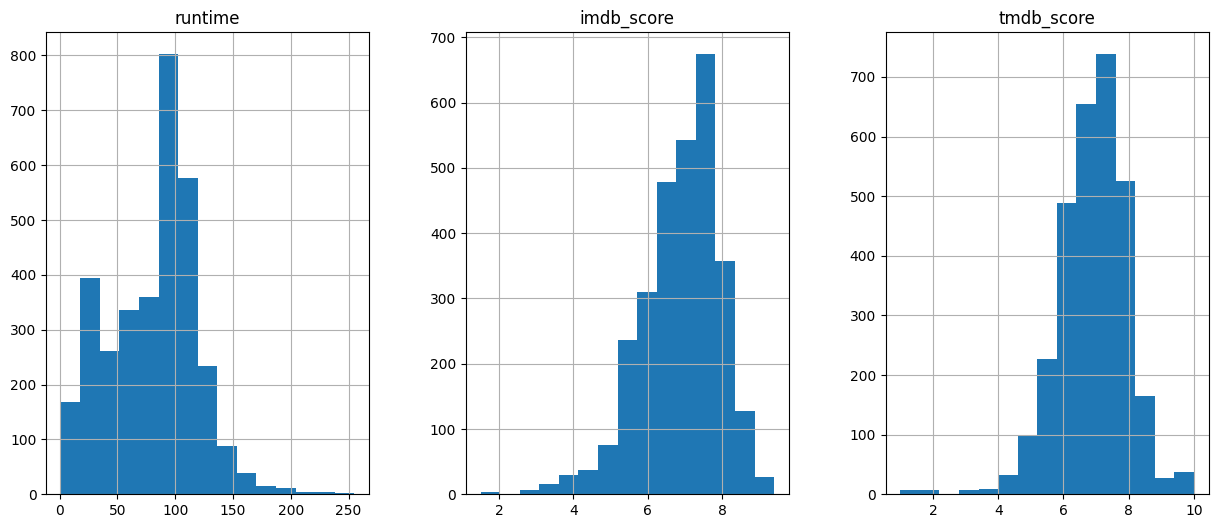

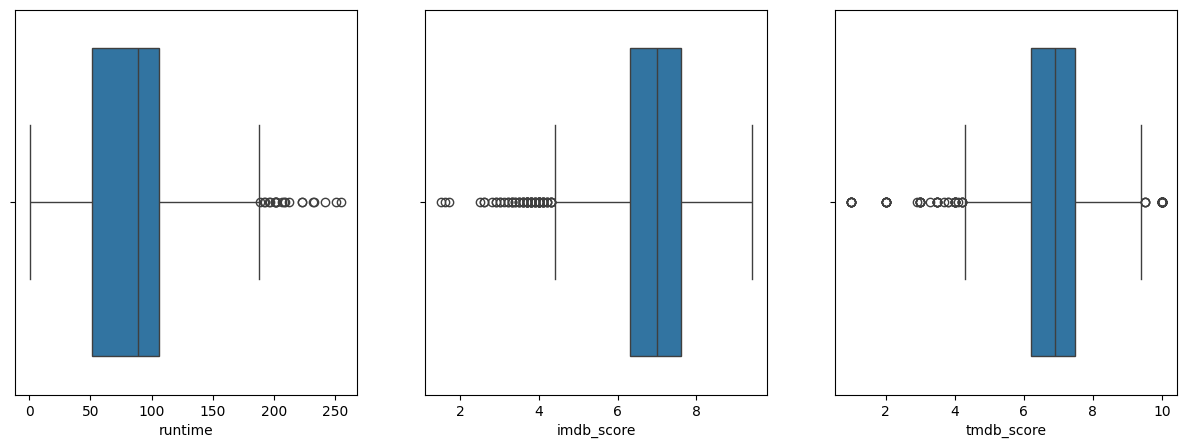

In [674]:
# Hisztogramok készítése
titles_df[['runtime', 'imdb_score', 'tmdb_score']].hist(bins=15, figsize=(15, 6), layout=(1, 3))
plt.show()

# Dobozdiagramok készítése kiugró értékek azonosítására
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x=titles_df['runtime'], ax=axes[0])
sns.boxplot(x=titles_df['imdb_score'], ax=axes[1])
sns.boxplot(x=titles_df['tmdb_score'], ax=axes[2])
plt.show()

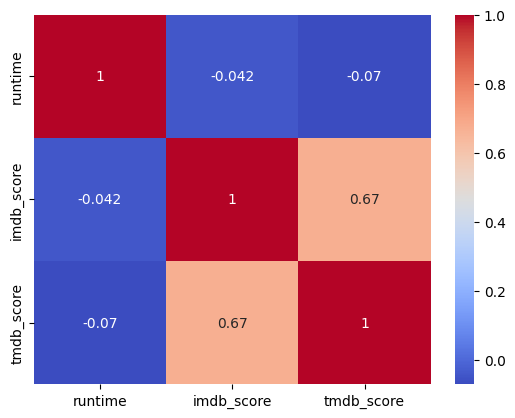

In [675]:
# Korrelációs mátrix készítése
correlation_matrix = titles_df[['runtime', 'imdb_score', 'tmdb_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [676]:
# TMDB értékelések és népszerűségi pontok eltávolítása a DataFrame-ből, mivel a predikció célváltozója az IMDB értékelés lesz, és nem az a cél, hogy a modell az egyik értékelés alapján jósolja meg a másikat.
titles_df.drop(columns=['tmdb_popularity', 'tmdb_score'], inplace=True)

In [677]:
titles_df.head()

,id,title,type,release_decade,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,total_cast
0,tm155702,The Wizard of Oz,MOVIE,1930,G,102,"[fantasy, family]",[US],NaN,tt0032138,8.1,389774.0,23
1,tm83648,Citizen Kane,MOVIE,1940,PG,119,[drama],[US],NaN,tt0033467,8.3,433804.0,153
2,tm77588,Casablanca,MOVIE,1940,PG,102,"[drama, romance, war]",[US],NaN,tt0034583,8.5,558849.0,106
3,tm82363,The Big Sleep,MOVIE,1940,PG-0,116,"[thriller, crime]",[US],NaN,tt0038355,7.9,84494.0,47
4,tm84701,The Maltese Falcon,MOVIE,1940,PG-0,100,"[thriller, romance, crime]",[US],NaN,tt0033870,8.0,156603.0,23


In [678]:
titles_df['type'].unique()

array(['MOVIE', 'SHOW'], dtype=object)

In [679]:
titles_df['age_certification'].unique()

array(['G', 'PG', 'PG-0', 'PG-13', 'R', 'TV-G', 'TV-Y', 'TV-PG', 'TV-Y7',
       'NC-17', 'TV-14', 'TV-MA'], dtype=object)

In [680]:
def unique_genres(df):
    unique_genres = set()
    for genres_list in df['genres']:
        if isinstance(genres_list, str):
            genres_list = ast.literal_eval(genres_list)
        unique_genres.update(genres_list)
    return unique_genres

unique_genres(titles_df)

{'action',
 'animation',
 'comedy',
 'crime',
 'documentation',
 'drama',
 'european',
 'family',
 'fantasy',
 'history',
 'horror',
 'music',
 'reality',
 'romance',
 'scifi',
 'sport',
 'thriller',
 'war',
 'western'}

In [681]:
# Filmek kiválasztása
movies_df = titles_df[titles_df['type'] == 'MOVIE'].copy()

In [682]:
# Sorozatok kiválasztása
shows_df = titles_df[titles_df['type'] == 'SHOW'].copy()

In [683]:
movies_df.head()

,id,title,type,release_decade,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,total_cast
0,tm155702,The Wizard of Oz,MOVIE,1930,G,102,"[fantasy, family]",[US],NaN,tt0032138,8.1,389774.0,23
1,tm83648,Citizen Kane,MOVIE,1940,PG,119,[drama],[US],NaN,tt0033467,8.3,433804.0,153
2,tm77588,Casablanca,MOVIE,1940,PG,102,"[drama, romance, war]",[US],NaN,tt0034583,8.5,558849.0,106
3,tm82363,The Big Sleep,MOVIE,1940,PG-0,116,"[thriller, crime]",[US],NaN,tt0038355,7.9,84494.0,47
4,tm84701,The Maltese Falcon,MOVIE,1940,PG-0,100,"[thriller, romance, crime]",[US],NaN,tt0033870,8.0,156603.0,23


In [684]:
shows_df.head()

,id,title,type,release_decade,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,total_cast
6,ts225761,Tom and Jerry,SHOW,1940,PG-0,8,"[animation, comedy, family, action]",[US],16.0,tt12158994,7.7,853.0,2
197,ts22230,"Scooby-Doo, Where Are You!",SHOW,1960,TV-G,23,"[animation, comedy, crime, family]",[US],3.0,tt0063950,7.9,33962.0,8
214,ts15523,The Flintstones,SHOW,1960,TV-G,29,"[family, animation, comedy]",[US],6.0,tt0053502,7.5,36140.0,5
215,ts22243,Sesame Street,SHOW,1960,TV-Y,51,"[family, fantasy, music, animation, comedy]",[US],52.0,tt0063951,8.1,13666.0,1
217,ts20028,The Jetsons,SHOW,1960,TV-G,30,"[animation, family, scifi, comedy]",[US],3.0,tt0055683,7.0,20830.0,8


In [685]:
movies_df['seasons'].unique()

array([nan])

In [686]:
movies_df.drop(columns=['seasons'], inplace=True)

In [687]:
missing_seasons = shows_df['seasons'].isna().sum()
min_seasons = shows_df['seasons'].min()
max_seasons = shows_df['seasons'].max()
min_seasons, max_seasons, missing_seasons

(1.0, 52.0, 0)

In [688]:
movies_df['age_certification'].unique()

array(['G', 'PG', 'PG-0', 'PG-13', 'R', 'NC-17'], dtype=object)

In [689]:
shows_df['age_certification'].unique()

array(['PG-0', 'TV-G', 'TV-Y', 'TV-PG', 'TV-Y7', 'TV-14', 'TV-MA'],
      dtype=object)

In [690]:
#Sok változós attribútumok kosarakba rendezése
def categorize_age_certification(row):
    if row in ['G', 'TV-G', 'TV-Y', 'TV-Y7', 'PG-0']:
        return 'Gyermekbarát'
    elif row in ['PG', 'TV-PG', 'PG-13', 'TV-14']:
        return 'Fiataloknak ajánlott'
    elif row in ['R', 'NC-17', 'TV-MA']:
        return 'Felnőtteknek ajánlott'
    else:
        return 'Ismeretlen'

shows_df['age_cert_group'] = shows_df['age_certification'].apply(categorize_age_certification)
movies_df['age_cert_group'] = movies_df['age_certification'].apply(categorize_age_certification)

In [691]:
shows_df.drop(columns=['age_certification'], inplace=True)
movies_df.drop(columns=['age_certification'], inplace=True)

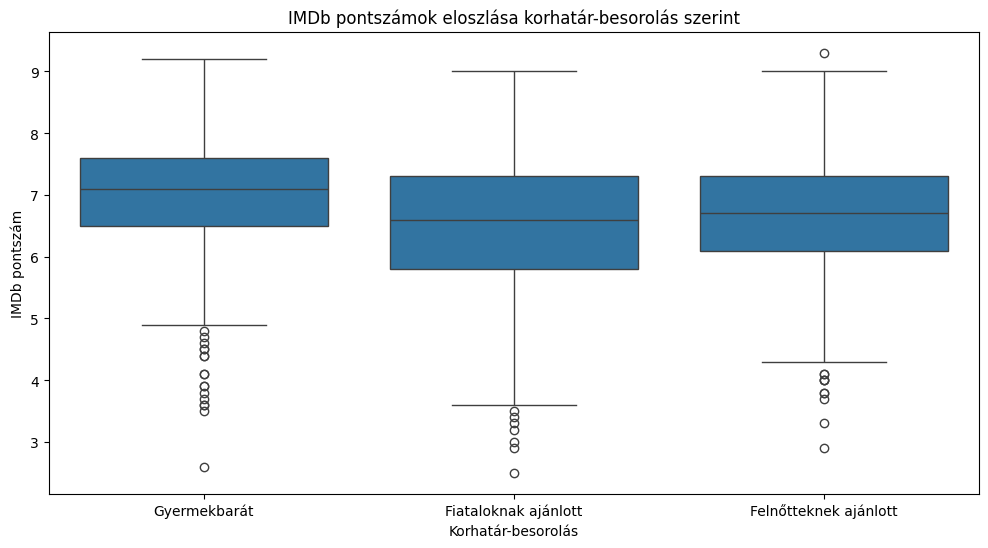

In [692]:
# Dobozdiagram az age_cert_group és imdb_score között
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_cert_group', y='imdb_score', data=movies_df)
plt.title('IMDb pontszámok eloszlása korhatár-besorolás szerint')
plt.xlabel('Korhatár-besorolás')
plt.ylabel('IMDb pontszám')
plt.show()

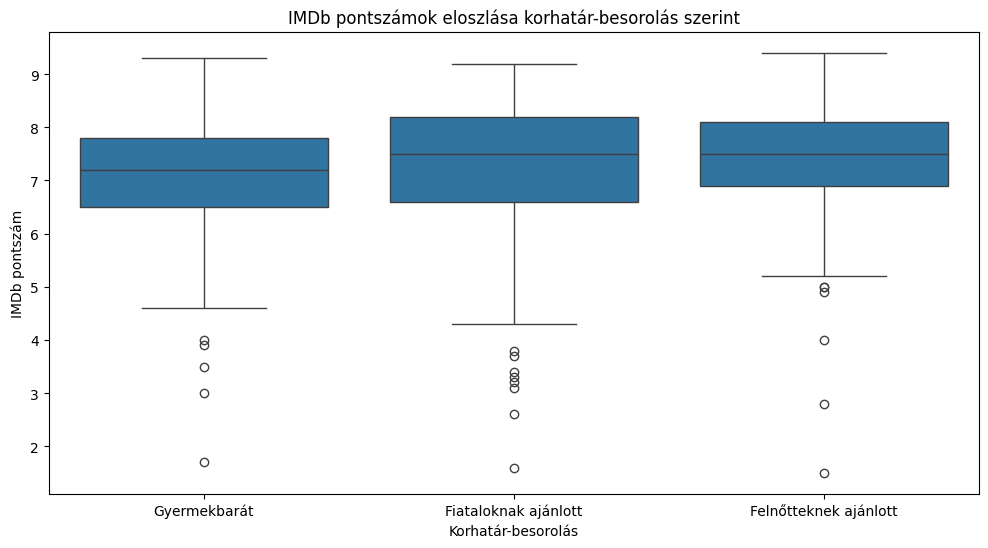

In [693]:
# Dobozdiagram az age_cert_group és imdb_score között
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_cert_group', y='imdb_score', data=shows_df)
plt.title('IMDb pontszámok eloszlása korhatár-besorolás szerint')
plt.xlabel('Korhatár-besorolás')
plt.ylabel('IMDb pontszám')
plt.show()

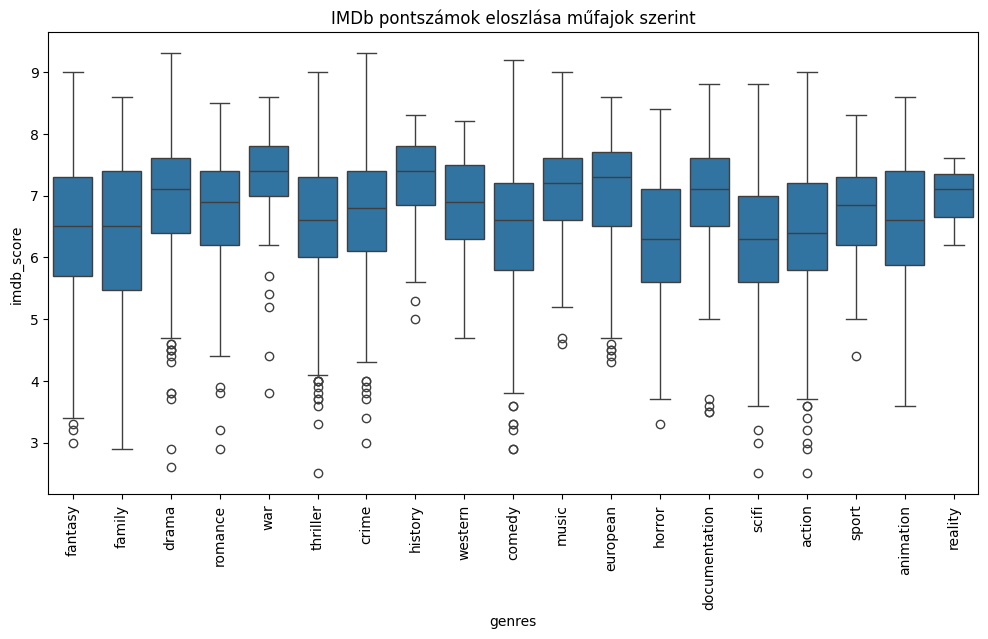

In [694]:
movies_exploded = movies_df.explode('genres')
movies_exploded = movies_exploded.reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.boxplot(data=movies_exploded, x='genres', y='imdb_score')
plt.xticks(rotation=90)
plt.title('IMDb pontszámok eloszlása műfajok szerint')
plt.show()

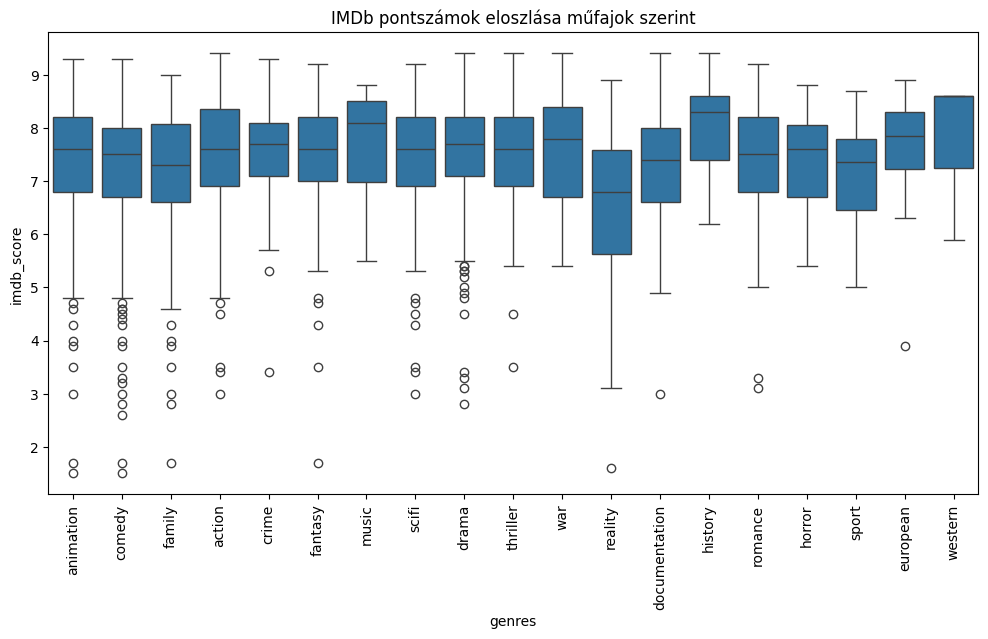

In [695]:
shows_exploded = shows_df.explode('genres')
shows_exploded = shows_exploded.reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.boxplot(data=shows_exploded, x='genres', y='imdb_score')
plt.xticks(rotation=90)
plt.title('IMDb pontszámok eloszlása műfajok szerint')
plt.show()

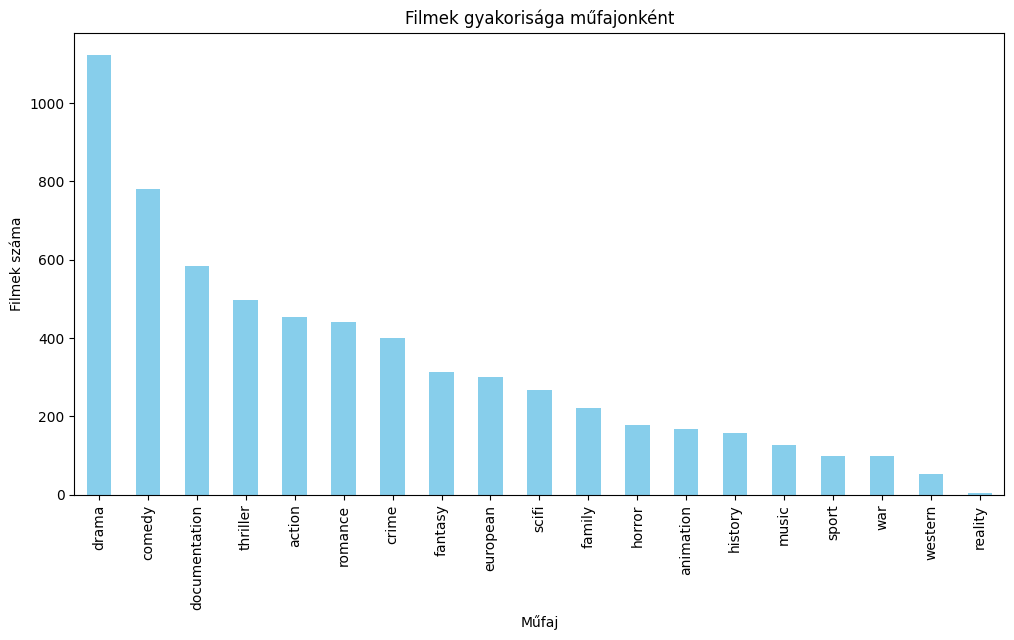

In [696]:
genre_counts = movies_df.explode('genres')['genres'].value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Filmek gyakorisága műfajonként')
plt.xlabel('Műfaj')
plt.ylabel('Filmek száma')
plt.xticks(rotation=90)
plt.show()

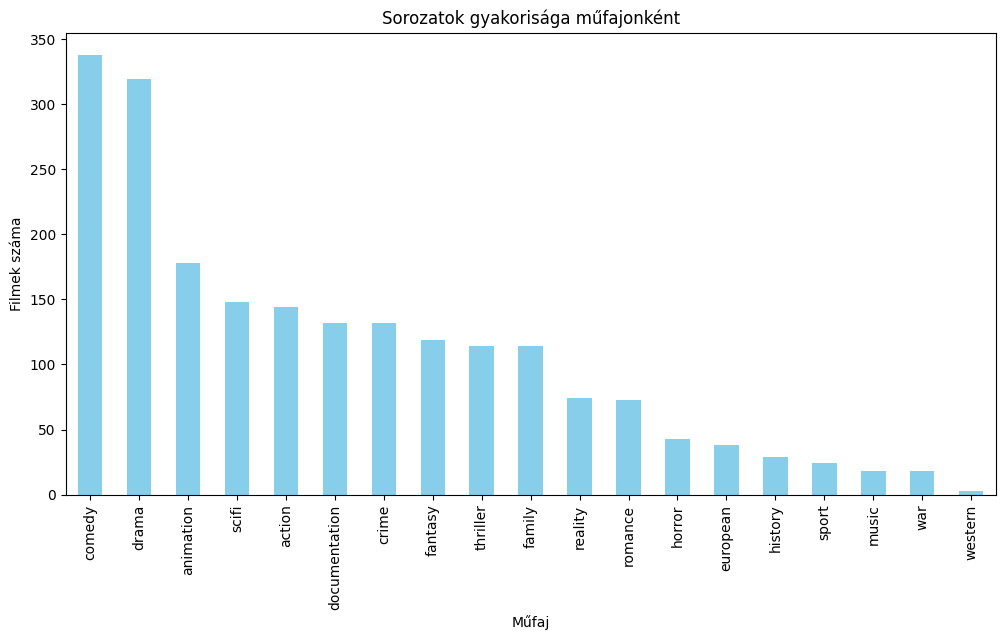

In [697]:
genre_counts = shows_df.explode('genres')['genres'].value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Sorozatok gyakorisága műfajonként')
plt.xlabel('Műfaj')
plt.ylabel('Filmek száma')
plt.xticks(rotation=90)
plt.show()


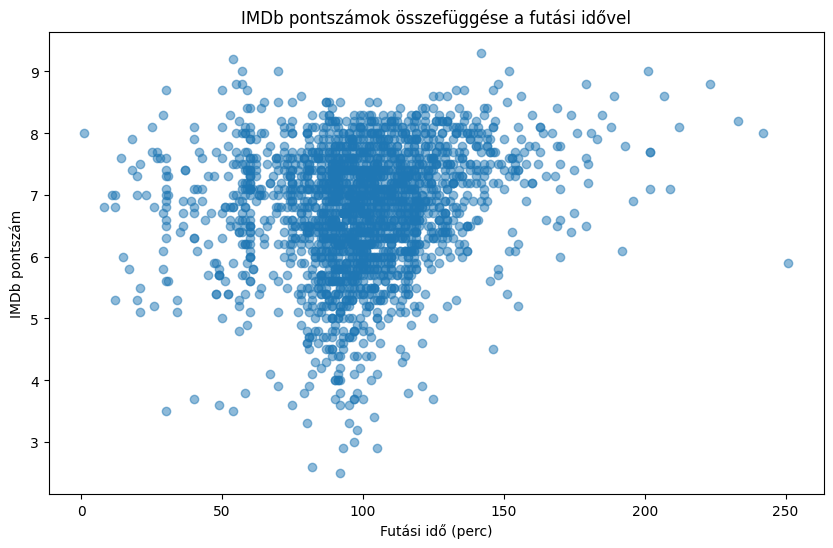

In [698]:
plt.figure(figsize=(10, 6))
plt.scatter(movies_df['runtime'], movies_df['imdb_score'], alpha=0.5)
plt.title('IMDb pontszámok összefüggése a futási idővel')
plt.xlabel('Futási idő (perc)')
plt.ylabel('IMDb pontszám')
plt.show()

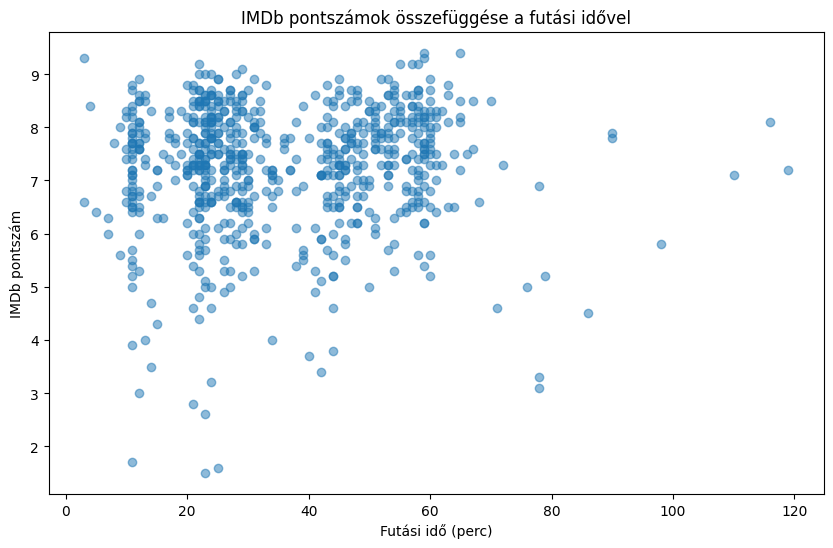

In [699]:
plt.figure(figsize=(10, 6))
plt.scatter(shows_df['runtime'], shows_df['imdb_score'], alpha=0.5)
plt.title('IMDb pontszámok összefüggése a futási idővel')
plt.xlabel('Futási idő (perc)')
plt.ylabel('IMDb pontszám')
plt.show()

In [700]:
# Átlagos IMDb pontszám minden színészhez
actor_avg_score = actors_df.merge(titles_df[['id', 'imdb_score']], on='id')
actor_avg_score = actor_avg_score.groupby('person_id')['imdb_score'].mean().reset_index()
actor_avg_score.columns = ['person_id', 'avg_actor_score']

actors_df = actors_df.merge(actor_avg_score, on='person_id', how='left')
actors_df.head()

,person_id,id,name,character_name,avg_actor_score
0,60017,tm155702,Judy Garland,Dorothy Gale,7.466667
1,53496,tm155702,Ray Bolger,Hunk / Scarecrow,8.100000
2,79549,tm155702,Jack Haley,Hickory / Tin Man,8.100000
3,79548,tm155702,Bert Lahr,Zeke / Cowardly Lion,8.100000
4,60995,tm155702,Margaret Hamilton,Elmira Gulch / Wicked Witch of the West,7.450000


In [701]:
# Átlagos IMDb pontszám minden rendezőhöz
director_avg_score = directors_df.merge(titles_df[['id', 'imdb_score']], on='id')
director_avg_score = director_avg_score.groupby('person_id')['imdb_score'].mean().reset_index()
director_avg_score.columns = ['person_id', 'avg_director_score']

directors_df = directors_df.merge(director_avg_score, on='person_id', how='left')
directors_df.head()

,person_id,id,name,avg_director_score
0,20730,tm88216,Peter Chelsom,6.100000
1,25878,tm132321,Steve Carr,5.150000
2,18336,tm134606,Mark Waters,5.800000
3,23839,tm82363,Howard Hawks,7.866667
4,17900,tm84701,John Huston,7.600000


In [702]:
# Kibontás
exploded_genres = movies_df.explode('genres').reset_index(drop=True)

# Dummy változók készítése
genre_dummies = pd.get_dummies(exploded_genres['genres'], prefix='genre')

# Eredeti DataFrame indexének resetelése
movies_df = movies_df.drop('genres', axis=1).reset_index(drop=True)

# Eredeti DataFrame-hez való csatlakoztatás
movies_df = pd.concat([movies_df, genre_dummies], axis=1)

movies_df.head()


,id,title,type,release_decade,runtime,production_countries,imdb_id,imdb_score,imdb_votes,total_cast,...,genre_history,genre_horror,genre_music,genre_reality,genre_romance,genre_scifi,genre_sport,genre_thriller,genre_war,genre_western
0,tm155702,The Wizard of Oz,MOVIE,1930,102.0,[US],tt0032138,8.1,389774.0,23.0,...,False,False,False,False,False,False,False,False,False,False
1,tm83648,Citizen Kane,MOVIE,1940,119.0,[US],tt0033467,8.3,433804.0,153.0,...,False,False,False,False,False,False,False,False,False,False
2,tm77588,Casablanca,MOVIE,1940,102.0,[US],tt0034583,8.5,558849.0,106.0,...,False,False,False,False,False,False,False,False,False,False
3,tm82363,The Big Sleep,MOVIE,1940,116.0,[US],tt0038355,7.9,84494.0,47.0,...,False,False,False,False,False,False,False,False,False,False
4,tm84701,The Maltese Falcon,MOVIE,1940,100.0,[US],tt0033870,8.0,156603.0,23.0,...,False,False,False,False,True,False,False,False,False,False


In [703]:
# Kibontás
exploded_genres = shows_df.explode('genres').reset_index(drop=True)

# Dummy változók készítése
genre_dummies = pd.get_dummies(exploded_genres['genres'], prefix='genre')

# Eredeti DataFrame indexének resetelése
shows_df = shows_df.drop('genres', axis=1).reset_index(drop=True)

# Eredeti DataFrame-hez való csatlakoztatás
shows_df = pd.concat([shows_df, genre_dummies], axis=1)

shows_df.head()

,id,title,type,release_decade,runtime,production_countries,seasons,imdb_id,imdb_score,imdb_votes,...,genre_history,genre_horror,genre_music,genre_reality,genre_romance,genre_scifi,genre_sport,genre_thriller,genre_war,genre_western
0,ts225761,Tom and Jerry,SHOW,1940,8.0,[US],16.0,tt12158994,7.7,853.0,...,False,False,False,False,False,False,False,False,False,False
1,ts22230,"Scooby-Doo, Where Are You!",SHOW,1960,23.0,[US],3.0,tt0063950,7.9,33962.0,...,False,False,False,False,False,False,False,False,False,False
2,ts15523,The Flintstones,SHOW,1960,29.0,[US],6.0,tt0053502,7.5,36140.0,...,False,False,False,False,False,False,False,False,False,False
3,ts22243,Sesame Street,SHOW,1960,51.0,[US],52.0,tt0063951,8.1,13666.0,...,False,False,False,False,False,False,False,False,False,False
4,ts20028,The Jetsons,SHOW,1960,30.0,[US],3.0,tt0055683,7.0,20830.0,...,False,False,False,False,False,False,False,False,False,False


In [704]:
# Definiáljuk a made_in_US oszlopot
movies_df['made_in_US'] = movies_df['production_countries'].apply(lambda x: 'US' in x if isinstance(x, list) else False)
movies_df[['production_countries', 'made_in_US']].head()
movies_df.drop(columns=['production_countries'], inplace=True)
movies_df.head()

,id,title,type,release_decade,runtime,imdb_id,imdb_score,imdb_votes,total_cast,age_cert_group,...,genre_horror,genre_music,genre_reality,genre_romance,genre_scifi,genre_sport,genre_thriller,genre_war,genre_western,made_in_US
0,tm155702,The Wizard of Oz,MOVIE,1930,102.0,tt0032138,8.1,389774.0,23.0,Gyermekbarát,...,False,False,False,False,False,False,False,False,False,True
1,tm83648,Citizen Kane,MOVIE,1940,119.0,tt0033467,8.3,433804.0,153.0,Fiataloknak ajánlott,...,False,False,False,False,False,False,False,False,False,True
2,tm77588,Casablanca,MOVIE,1940,102.0,tt0034583,8.5,558849.0,106.0,Fiataloknak ajánlott,...,False,False,False,False,False,False,False,False,False,True
3,tm82363,The Big Sleep,MOVIE,1940,116.0,tt0038355,7.9,84494.0,47.0,Gyermekbarát,...,False,False,False,False,False,False,False,False,False,True
4,tm84701,The Maltese Falcon,MOVIE,1940,100.0,tt0033870,8.0,156603.0,23.0,Gyermekbarát,...,False,False,False,True,False,False,False,False,False,True


In [705]:
# Definiáljuk a made_in_US oszlopot
shows_df['made_in_US'] = shows_df['production_countries'].apply(lambda x: 'US' in x if isinstance(x, list) else False)
shows_df[['production_countries', 'made_in_US']].head()
shows_df.drop(columns=['production_countries'], inplace=True)
shows_df.head()

,id,title,type,release_decade,runtime,seasons,imdb_id,imdb_score,imdb_votes,total_cast,...,genre_horror,genre_music,genre_reality,genre_romance,genre_scifi,genre_sport,genre_thriller,genre_war,genre_western,made_in_US
0,ts225761,Tom and Jerry,SHOW,1940,8.0,16.0,tt12158994,7.7,853.0,2.0,...,False,False,False,False,False,False,False,False,False,True
1,ts22230,"Scooby-Doo, Where Are You!",SHOW,1960,23.0,3.0,tt0063950,7.9,33962.0,8.0,...,False,False,False,False,False,False,False,False,False,True
2,ts15523,The Flintstones,SHOW,1960,29.0,6.0,tt0053502,7.5,36140.0,5.0,...,False,False,False,False,False,False,False,False,False,True
3,ts22243,Sesame Street,SHOW,1960,51.0,52.0,tt0063951,8.1,13666.0,1.0,...,False,False,False,False,False,False,False,False,False,True
4,ts20028,The Jetsons,SHOW,1960,30.0,3.0,tt0055683,7.0,20830.0,8.0,...,False,False,False,False,False,False,False,False,False,True


In [706]:
movies_features = pd.get_dummies(movies_df['age_cert_group'], prefix='age_cert')
movies_df = movies_df.drop('age_cert_group', axis=1)
movies_df = pd.concat([movies_df, movies_features], axis=1)

shows_features = pd.get_dummies(shows_df['age_cert_group'], prefix='age_cert')
shows_df = shows_df.drop('age_cert_group', axis=1)
shows_df = pd.concat([shows_df, shows_features], axis=1)

In [707]:
# Eltávolítjuk a felesleges oszlopokat
columns_to_drop = ['title', 'type', 'imdb_id']
movies_df.drop(columns=columns_to_drop, inplace=True)
shows_df.drop(columns=columns_to_drop, inplace=True)

In [708]:
scaler = StandardScaler()
movies_df['runtime_scaled'] = scaler.fit_transform(movies_df[['runtime']])
movies_df['imdb_votes_scaled'] = scaler.fit_transform(movies_df[['imdb_votes']])
movies_df['total_cast_scaled'] = scaler.fit_transform(movies_df[['total_cast']])
movies_df['release_decade_scaled'] = scaler.fit_transform(movies_df[['release_decade']])

movies_df.drop(['runtime', 'imdb_votes', 'total_cast', 'release_decade'], axis=1, inplace=True)

shows_df['runtime_scaled'] = scaler.fit_transform(shows_df[['runtime']])
shows_df['imdb_votes_scaled'] = scaler.fit_transform(shows_df[['imdb_votes']])
shows_df['seasons_scaled'] = scaler.fit_transform(shows_df[['seasons']])
shows_df['total_cast_scaled'] = scaler.fit_transform(shows_df[['total_cast']])
shows_df['release_decade_scaled'] = scaler.fit_transform(shows_df[['release_decade']])

shows_df.drop(['runtime', 'imdb_votes', 'seasons', 'total_cast', 'release_decade'], axis=1, inplace=True)

In [709]:
movies_df.head()

,id,imdb_score,genre_action,genre_animation,genre_comedy,genre_crime,genre_documentation,genre_drama,genre_european,genre_family,...,genre_war,genre_western,made_in_US,age_cert_Felnőtteknek ajánlott,age_cert_Fiataloknak ajánlott,age_cert_Gyermekbarát,runtime_scaled,imdb_votes_scaled,total_cast_scaled,release_decade_scaled
0,tm155702,8.1,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,0.240673,1.646889,-0.056626,-2.472826
1,tm83648,8.3,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,0.765546,1.878107,5.550619,-2.081528
2,tm77588,8.5,False,False,False,False,False,True,False,False,...,False,False,True,False,True,False,0.240673,2.534765,3.523384,-2.081528
3,tm82363,7.9,False,False,False,False,False,True,False,False,...,False,False,True,False,False,True,0.672921,0.043750,0.978557,-2.081528
4,tm84701,8.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,0.178923,0.422421,-0.056626,-2.081528


In [710]:
shows_df.head()

,id,imdb_score,genre_action,genre_animation,genre_comedy,genre_crime,genre_documentation,genre_drama,genre_european,genre_family,...,genre_western,made_in_US,age_cert_Felnőtteknek ajánlott,age_cert_Fiataloknak ajánlott,age_cert_Gyermekbarát,runtime_scaled,imdb_votes_scaled,seasons_scaled,total_cast_scaled,release_decade_scaled
0,ts225761,7.7,False,True,False,False,False,False,False,False,...,False,True,False,False,True,-1.528322,-0.249971,3.563211,-0.736011,-6.575406
1,ts22230,7.9,False,False,True,False,False,False,False,False,...,False,True,False,False,True,-0.718227,0.061932,0.000363,0.315500,-4.682410
2,ts15523,7.5,False,False,False,False,False,False,False,True,...,False,True,False,False,True,-0.394189,0.082450,0.822558,-0.210256,-4.682410
3,ts22243,8.1,True,False,False,False,False,False,False,False,...,False,True,False,False,True,0.793950,-0.129266,13.429562,-0.911263,-4.682410
4,ts20028,7.0,False,True,False,False,False,False,False,False,...,False,True,False,False,True,-0.340183,-0.061778,0.000363,0.315500,-4.682410


In [711]:
actors_df.drop(['name', 'character_name'], axis=1, inplace=True)
actors_df.head()

,person_id,id,avg_actor_score
0,60017,tm155702,7.466667
1,53496,tm155702,8.100000
2,79549,tm155702,8.100000
3,79548,tm155702,8.100000
4,60995,tm155702,7.450000


In [712]:
directors_df.drop(['name'], axis=1, inplace=True)
directors_df.head()

,person_id,id,avg_director_score
0,20730,tm88216,6.100000
1,25878,tm132321,5.150000
2,18336,tm134606,5.800000
3,23839,tm82363,7.866667
4,17900,tm84701,7.600000


In [722]:
# Adatok előkészítése
movies_df = movies_df.dropna(subset=['imdb_score'])
X = movies_df.drop(['id', 'imdb_score'], axis=1)
y = movies_df['imdb_score']

In [724]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

imputer = SimpleImputer(strategy='mean')

# Pipeline létrehozása az imputer és a regresszor között
pipeline = make_pipeline(imputer, LinearRegression())

# Adatok felosztása tanító és teszt halmazokra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell tanítása a pipeline használatával
pipeline.fit(X_train, y_train)

# Predikció a teszt adatokon
y_pred = pipeline.predict(X_test)

# Modell teljesítményének értékelése
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.7168800550499219, 0.20699207297341649)

In [738]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = movies_df.drop(['id', 'imdb_score'], axis=1)
y = movies_df['imdb_score']

imputer = SimpleImputer(strategy='mean')

# Imputer alkalmazása a tanító adatokra
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Újra modell létrehozása és tanítása az imputált adatokkal
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train_imputed, y_train)

# Predikciók készítése
y_pred = gb_regressor.predict(X_test_imputed)

# Modell teljesítményének kiértékelése
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.5934071247953017, 0.3435770034305704)

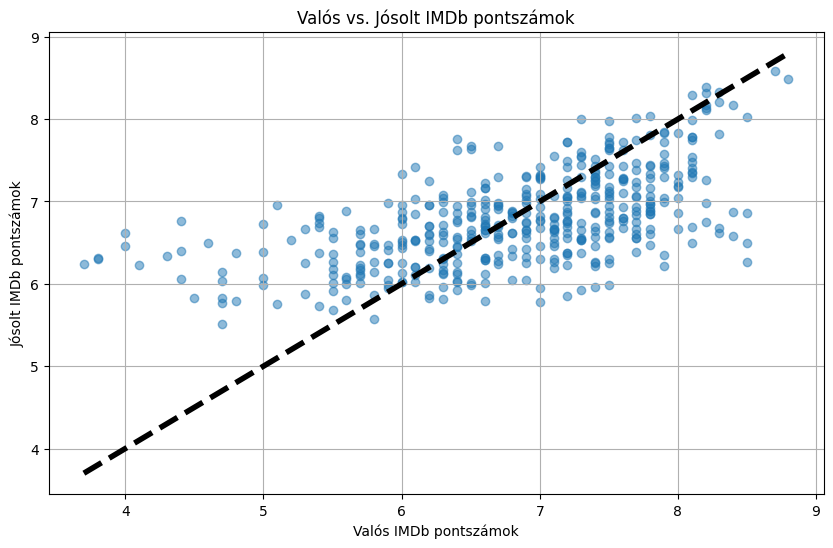

In [739]:
import matplotlib.pyplot as plt

# Valós és jósolt értékek összehasonlítása
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Valós vs. Jósolt IMDb pontszámok')
plt.xlabel('Valós IMDb pontszámok')
plt.ylabel('Jósolt IMDb pontszámok')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.grid(True)
plt.show()